In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [22]:

df = pd.read_csv('/content/imdb_top_1000.csv')

In [23]:
df.shape

(1000, 16)

In [24]:
Certificate_votes = df[['Certificate', 'No_of_Votes']]
Certificate_votes

,Certificate,No_of_Votes
0,A,2343110
1,A,1620367
2,UA,2303232
3,A,1129952
4,U,689845
...,...,...
995,A,166544
996,G,34075
997,Passed,43374
998,NaN,26471


In [25]:
Certificate_votes['Certificate']=='A'

0       True
1       True
2      False
3       True
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Name: Certificate, Length: 1000, dtype: bool

In [26]:
A_votes = Certificate_votes['No_of_Votes'] [Certificate_votes['Certificate'] == 'A']
df1 = pd.DataFrame(A_votes)
df1

,No_of_Votes
0,2343110
1,1620367
3,1129952
6,1826188
7,1213505
...,...
985,121731
987,73662
989,26337
993,56513


In [44]:
financialvolume = Certificate_votes['No_of_Votes'] [Certificate_votes['Certificate'] == 'U']
df2 = pd.DataFrame(financialvolume)
df2

,No_of_Votes
4,689845
5,1642758
10,1661481
20,54995
23,651376
...,...
984,32802
986,33656
988,184966
992,166409


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aa0b07850>]],
      dtype=object)

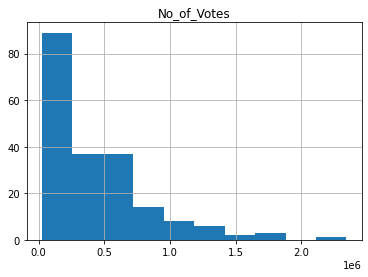

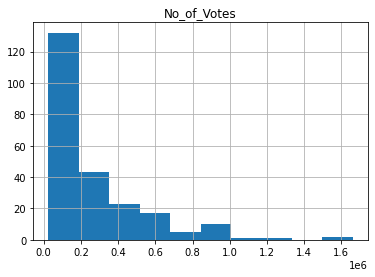

In [45]:
df1.hist()
df2.hist()

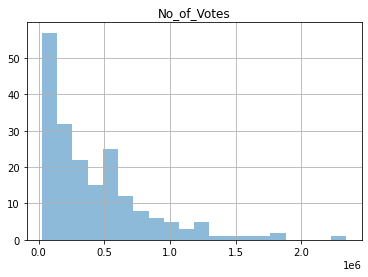

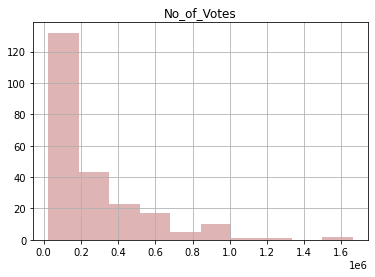

In [46]:
import seaborn as sns
df1.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
df2.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.show()

In [30]:
#Hypothesis :

H0: In the population, the distribution of No_of_Votes of A rated films is the same as U rated films<br>
H1:In the population, the distribution of No_of_Votes of A rated films is the same as U rated films

In [32]:
#Test Statistic : observation difference between the average of 2 groups

In [47]:
means_table  = Certificate_votes.groupby('Certificate').mean()
means_table

,No_of_Votes
Certificate,
16,47708.000000
A,428215.045685
Approved,71679.727273
G,134312.500000
GP,45386.000000
PG,101580.567568
PG-13,144101.976744
Passed,73523.088235
R,212991.869863


In [48]:
observed_difference = means_table['No_of_Votes'][9] - means_table['No_of_Votes'][11]
observed_difference

-441.0

In [50]:
shuffled = Certificate_votes.sample(501,replace = False)
shuffled

,Certificate,No_of_Votes
146,U,935507
615,A,564791
39,UA,1341460
92,NaN,78925
17,A,918088
...,...,...
173,A,321860
857,A,40274
966,U,269197
197,16,47708


In [51]:
means_table  = shuffled.groupby('Certificate').mean()
means_table

,No_of_Votes
Certificate,
16,47708.000000
A,439881.290000
Approved,77685.625000
G,171735.571429
GP,45386.000000
PG,105585.739130
PG-13,152292.125000
Passed,81292.142857
R,210286.608108


In [52]:
diff = means_table['No_of_Votes'][9] - means_table['No_of_Votes'][11]
diff

-237215.30630630633

In [53]:

differences = np.zeros(5000)

In [54]:
for i in np.arange(5000):
  Certificate_votes = df[['Certificate', 'No_of_Votes']]
  shuffled = Certificate_votes.sample(1000,replace = False)
  shuffled_volume = shuffled['No_of_Votes']
  original_and_shuffled = Certificate_votes.assign(shuffled_volume=shuffled_volume.values )
  all_group_means= original_and_shuffled.groupby('Certificate').mean()
  difference = all_group_means['shuffled_volume'][9]- all_group_means['shuffled_volume'][11]
  differences[i]=difference

In [55]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,252570.000000
1,-210100.000000
2,-100984.666667
3,139879.333333
4,-164953.666667
...,...
4995,161061.333333
4996,-147916.666667
4997,-54860.666667
4998,-95669.333333


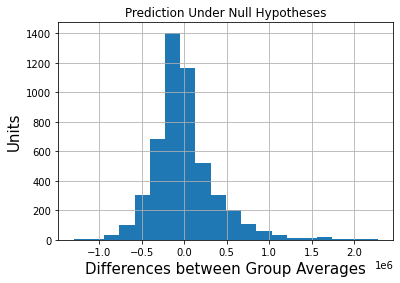

In [56]:
differences_df.hist(bins = 20)
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference,100,color='red',s=30)

In [57]:
P_Value = np.count_nonzero(differences <= observed_difference)/differences.size
P_Value

0.5978

p-value>0.05<br>
There the given data support the null hypothesis.<br>
Therefore, null hypothesis could not be rejected.